# Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [2]:
def group_rating(rating):
    if rating <= 2:
        return 'Низкий рейтинг'
    elif rating <= 4:
        return 'Средний рейтинг'
    else:
        return 'Высокий рейтинг'

import pandas as pd
data = pd.read_csv('Python_7_pandas_functions_groupby/ml-latest-small/ratings.csv')

print('было:')
display(data.head())

data['class'] = data.rating.apply(group_rating)

print('стало:')
display(data.head())

data['class'].value_counts(normalize = True)




было:


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


стало:


,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,Средний рейтинг
1,1,1029,3.0,1260759179,Средний рейтинг
2,1,1061,3.0,1260759182,Средний рейтинг
3,1,1129,2.0,1260759185,Низкий рейтинг
4,1,1172,4.0,1260759205,Средний рейтинг


Средний рейтинг    0.637984
Высокий рейтинг    0.228171
Низкий рейтинг     0.133845
Name: class, dtype: float64

# Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

Результат классификации запишите в отдельный столбец region.

In [3]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [4]:
def region_name(row,geo_dict):
    for key,value in geo_dict.items():
        for word in value:   
            if word in row.keyword:
                return key
    return 'undefined'
        
data_keywords = pd.read_csv('Python_7_pandas_functions_groupby/keywords.csv')
data_keywords['region'] = data_keywords.apply(region_name, geo_dict=geo_data, axis=1)
data_keywords.region.value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

# Задание 3
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

,rating
year,
1957,4.014241
1972,4.011136
1952,4.000000
1954,3.994220
1951,3.983539


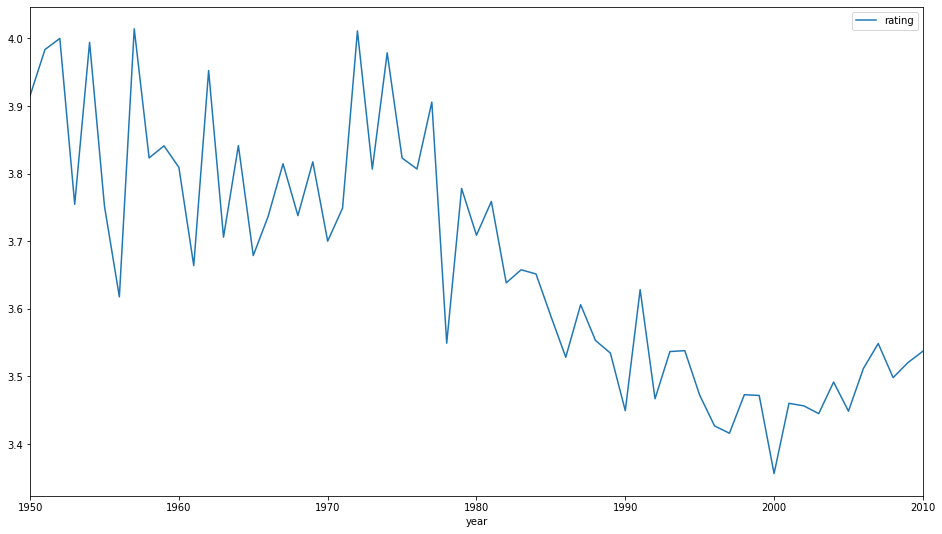

In [4]:
def production_year(row, start, stop):
    for y in range(start,stop+1):
        if str(y) in row.title:
            return y
    return 1900

data_r = pd.read_csv('Python_7_pandas_functions_groupby/ml-latest-small/ratings.csv')

data_m = pd.read_csv('Python_7_pandas_functions_groupby/ml-latest-small/movies.csv')
data_m['year'] = data_m.apply(production_year, start=1950, stop=2010, axis=1)

data_merged = data_r.merge(data_m, how='left')

data_final = data_merged[data_merged.year != 1900].pivot_table(index = 'year', values = 'rating', aggfunc = 'mean', fill_value = 0).sort_values(by=['year'], ascending=True)
data_final.plot(figsize=(16, 9))
data_final.sort_values(by='rating', ascending=False).head()